In [1]:
# pip install tscluster

In [2]:
# pip install statsmodels

# Imports

In [1]:
from __future__ import annotations

import time
from itertools import combinations
from functools import reduce

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import numpy.typing as npt
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.pylab as pl

from tscluster.tskmeans import TSKmeans
from tscluster.preprocessing.utils import ntf_to_tnf
from tscluster.tsplot import tsplot as tsp

from sklearn.cluster import KMeans
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import scipy.stats as stats




## Business Pattern (BP)

In [2]:
ts_arr = np.load(r"chicago_bp_arr_scaled.npy")
ts_arr.shape

FileNotFoundError: [Errno 2] No such file or directory: 'chicago_bp_arr_scaled.npy'

In [24]:
ctuids = np.load('Chicago_zip_codes.npy')
print(ctuids.shape)


(67,)


In [25]:
zip_codes = np.load("cook_zip_codes.npy")
len(zip_codes)

175

In [26]:
chicago_mask = np.isin(zip_codes, ctuids)
chicago_mask

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [27]:
chicago_mask.sum()

66

In [28]:
chicago_mask2 = np.isin(ctuids, zip_codes)
chicago_mask2.sum()

66

In [29]:
ts_arr = ts_arr[:, chicago_mask2, :]
ts_arr.shape

(20, 66, 5)

In [30]:
# bad_idx = []
# for i in range(ts_arr.shape[1]):
#     for f in range(ts_arr.shape[2]):
#         if len(np.unique(ts_arr[:, i, f])) == 1:
#             bad_idx.append(i)
#             break
            
# bad_idx_mask = np.ones(ts_arr.shape[1], dtype=bool)
# bad_idx_mask[bad_idx] = False
# bad_idx_mask.sum()

In [31]:
# ts_arr = ts_arr[:, bad_idx_mask, :][:, :, :]
# ts_arr.shape

In [32]:
# # differencing
# lst = []

# for i in range(ts_arr.shape[1]):
#     lst.append(ts_arr[1:, i, :] - ts_arr[:-1, i, :])

# ts_arr = ntf_to_tnf(np.array(lst))
# ts_arr.shape

In [33]:
labels, important_feature_set = GC_PTSC(ts_arr, maxlag=1, k=None, lambda_reg=0, p_value_threshold=None, use_agg_clustering=False)
important_feature_set

{0: (0, 3),
 1: (2,),
 2: (3,),
 3: (1,),
 4: (0,),
 5: (1, 3),
 6: (2, 3),
 7: (0, 1),
 8: (1, 2),
 9: (0, 1, 2)}

In [34]:
labels, important_feature_set = GC_PTSC(ts_arr, maxlag=1, k=3, lambda_reg=0, p_value_threshold=None, use_agg_clustering=False)
important_feature_set

{0: (2,), 1: (3,), 2: (1,)}

In [35]:
labels

array([1., 0., 1., 1., 2., 1., 0., 1., 1., 0., 1., 1., 1., 2., 2., 2., 2.,
       1., 0., 2., 0., 2., 0., 1., 2., 0., 1., 1., 0., 1., 2., 0., 0., 0.,
       2., 0., 2., 0., 0., 2., 0., 2., 1., 0., 0., 2., 0., 1., 1., 2., 0.,
       2., 0., 2., 2., 2., 1., 0., 0., 0., 2., 2., 0., 0., 1., 0.])

# Elbow Plot

In [36]:
# Ks = np.arange(2, 10)
# maxlag = 1
# max_iter = 30
# fit_intercept = True 

# lr_totals = []

# t0 = time.time()
# for K in Ks:
#     lr_total_lst = []
#     for n_repeats in range(5):
#         theta_u, theta_r, C, lr_total, total_rss_u, total_rss_r = fit_lr_model(
#             ts_arr, K=K, maxlag=maxlag, max_iter=max_iter, random_state=None, verbose=False, fit_intercept=fit_intercept
#             )
        
#         lr_total_lst.append(lr_total)
    
#     lr_totals.append(np.mean(lr_total_lst))

#     print(f"Done with {K - Ks[0] + 1} of {len(Ks)}")

# print()
# print(f"Done after {np.round((time.time() - t0)/60, 2)}mins")
    

In [37]:
# plt.plot(Ks, lr_totals, marker='.')
# plt.xlabel('# of clusters')
# plt.ylabel('Likelihood Ratio')
# plt.title('Elbow Plot for Cook Census Data using GC-PTSC')
# plt.savefig('elbow_plot.svg', bbox_inches='tight')
# plt.show()

# Modeling Census Data

In [38]:
# K = 5
# maxlag = 1
# max_iter = 20
# fit_intercept = True 

# theta_u, theta_r, C, lr_total, total_rss_u, total_rss_r = fit_lr_model(
#     ts_arr, K=K, maxlag=maxlag, max_iter=max_iter, random_state=0, fit_intercept=fit_intercept
#     )

# # theta_u, C, lr_total = rss_only_model(
# #     ts_arr, K=K, maxlag=maxlag, max_iter=max_iter, random_state=0, fit_intercept=fit_intercept
# #     )

# # # 3, 9, 2,  k=5 for diff; 

In [39]:
# print(f"Done, obj = {lr_total}")

In [40]:
# labels = np.argmax(C, axis=1)
# labels

In [41]:
# errors = []

# # for i in range(N):
# #     Xi = ts_arr[:, i, :].copy()

# for j in range(K):
#     X_u_lst = []
#     y_lst = []

#     i_mask = np.argmax(C, axis=1) == j
#     X_j = ts_arr[:, i_mask, :]
    
#     for i in range(X_j.shape[1]):
#         Xi_u, Xi_r, yi = create_design_data(X_j[:, i, :], maxlag=maxlag, y_col_idx=-1, fit_intercept=fit_intercept)

#         X_u_lst.append(Xi_u)
        
#         y_lst.append(yi)

#     X_u_arr = np.vstack(X_u_lst)
#     y_arr = np.vstack(y_lst)

#     errors.append(y_arr - np.matmul(X_u_arr, theta_u[j]))

In [42]:
# n_rows = 2
# n_cols = 3

# fig = plt.figure(figsize=(12, 6))
# for j in range(len(errors)):
#     plt.subplot(n_rows, n_cols, j+1)

#     plt.hist(errors[j])

#     if (j + 1) > (n_rows - 1) * n_cols:
#         plt.xlabel('error')

#     if (j + 1) % n_cols == 1:
#         plt.ylabel("Frequency")

#     plt.title(f"cluster {j}")

# plt.show()

In [43]:

# vars = ['C', 'A', 'B']

# def print_model(theta_us, vars=vars, maxlag=maxlag, fit_intercept=False, sort_by_weights=False, return_coef_names=False):

#     coef_names = []

#     for j in range(len(theta_us)):
#         equ_str = f"Cluster {j}: "

#         coef_str_lst = []

#         theta_j = theta_us[j].flatten()

#         if fit_intercept:
#             n_par = len(theta_j) - 1
#             intercept_str = f"+ {np.round(theta_j[-1], 4)}"
#         else:
#             n_par = len(theta_j)
#             intercept_str = ""
            
#         for coef_f in range(n_par):
#             var_i, lag_i = np.unravel_index(coef_f, (len(vars), maxlag))

#             coef_str_lst.append(f"{np.round(theta_j[coef_f], 4)} {vars[var_i]}_{lag_i+1} ")

#             if j == 0:
#                 coef_names.append(f"{vars[var_i]}_{lag_i+1}")

#         if sort_by_weights:
#             coef_str_lst = sorted(coef_str_lst, key=lambda x: np.abs(float(x.split(' ')[0])), reverse=True)
#         # coef_str_lst = sorted(coef_str_lst, key=lambda x: -1 * np.abs(float(x.split(' ')[1])))

#         else:
#             coef_str_lst = sorted(coef_str_lst, key=lambda x: 
#                             (x.split(' ')[1].split('_')[0], -1 * int(x.split(' ')[1].split('_')[1])), 
#                             reverse=True)
        
#         equ_str += " + ".join(coef_str_lst)

#         equ_str += intercept_str

#         print(equ_str)
#         print()
        
#     if return_coef_names:
#         if fit_intercept:
#             return coef_names + ['intercept']
#         return coef_names
    

In [44]:
y_var = ['ArtsEntertainment&Recreation']
x_vars = [
    'Finance&Insurance',
    'ProfessionalScientific&Technical_services',
    'Health_care&Social_assistance',
    'Accommodation&Food_services'
    ]

# 52 -> Finance and insurance
# 54 -> Professional, scientific, and technical services
# 62 -> Health care and social assistance
# 72 -> Accommodation and food services
# 71 -> Arts, entertainment, and recreation

vars = y_var + x_vars

# print_model(theta_u, vars=vars, maxlag=maxlag, fit_intercept=fit_intercept)


In [45]:
# vars = [
#     'HouseholdIncome',
#     'TotalPopulation',
#     'MedianAge(years)',
#     'PercentBAOrHigher',
#     'PercentUnemployed']


# coef_names = print_model(theta_u, vars=vars, maxlag=maxlag, sort_by_weights=True, fit_intercept=fit_intercept, return_coef_names=True)


In [46]:
# nrow, ncol = (2, 3)

# fig = plt.figure(figsize=(15, 4))

# for j in range(len(theta_u)):
#     fig.add_subplot(nrow, ncol, j+1)

#     plt.bar(coef_names, theta_u[j].flatten(), label=f"cluster {j}")

#     if (j+1) > len(theta_u) - ncol: 
#         plt.xticks(rotation=90)
#     else:
#         plt.xticks([], [])

#     if j % ncol == 0:
#         plt.ylabel("coefficient")

#     plt.legend()

# plt.savefig("cook_census_cluster_coef.svg", bbox_inches='tight')
# plt.show()

# Map

In [47]:
gdf = gpd.read_file(r".\cb_2019_us_zcta510_500k.zip")
print(gdf.shape)
gdf.head()

(33144, 6)


,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,35586,8600000US35586,35586,472581657,892816,"MULTIPOLYGON (((-88.0016 33.811, -88.00258 33...."
1,72454,8600000US72454,72454,263532032,775633,"POLYGON ((-90.41711 36.36553, -90.41686 36.390..."
2,71653,8600000US71653,71653,817752215,89308151,"POLYGON ((-91.45936 33.30273, -91.45758 33.381..."
3,19963,8600000US19963,19963,276290156,21123546,"POLYGON ((-75.50557 38.92751, -75.50313 38.927..."
4,81303,8600000US81303,81303,557450510,6445737,"POLYGON ((-108.04031 37.09764, -108.03896 37.1..."


In [48]:
zip_codes = np.load("cook_zip_codes.npy")
len(zip_codes)

175

In [49]:
gdf = gdf[gdf['ZCTA5CE10'].astype(int).isin(zip_codes[chicago_mask])][['ZCTA5CE10', 'geometry']].rename(columns={'ZCTA5CE10': 'zip_code'})
gdf['zip_code'] = gdf['zip_code'].astype(int)
print(gdf.shape)
gdf.head()

(66, 2)


,zip_code,geometry
418,60176,"POLYGON ((-87.89076 41.95803, -87.8843 41.9575..."
422,60602,"POLYGON ((-87.6339 41.88447, -87.62536 41.8845..."
424,60654,"POLYGON ((-87.64774 41.8964, -87.64414 41.8964..."
1338,60624,"POLYGON ((-87.7412 41.89509, -87.72485 41.8949..."
1562,60603,"POLYGON ((-87.63382 41.88195, -87.62781 41.882..."


aligning the ordering of the zipcodes

In [50]:
gdf = gdf.set_index('zip_code').loc[zip_codes[chicago_mask], :].loc[ctuids[chicago_mask2]]
print(gdf.shape)
gdf.head()

(66, 1)


,geometry
zip_code,
60007,"POLYGON ((-88.06053 42.00427, -88.05565 42.004..."
60018,"POLYGON ((-87.94651 42.01956, -87.94722 42.020..."
60068,"POLYGON ((-87.86842 42.03908, -87.8648 42.0391..."
60131,"POLYGON ((-87.92048 41.95208, -87.92017 41.958..."
60176,"POLYGON ((-87.89076 41.95803, -87.8843 41.9575..."


In [51]:

# ctuid_series = pd.Series(ctuids)
# missing_ctuids = ctuid_series[~ctuid_series.isin(list(gdf.index))].sort_values()
# missing_ctuids

In [52]:
# ctuids_mask = pd.Series(ctuids).isin(gdf.index).values
# ctuids_mask

In [53]:
y_var = ['ArtsEntertainment&Recreation']
x_vars = [
    'Finance&Insurance',
    'ProfessionalScientific&Technical_services',
    'Health_care&Social_assistance',
    'Accommodation&Food_services'
    ]

vars = y_var + x_vars

In [54]:
important_feature_set

{0: (2,), 1: (3,), 2: (1,)}

In [55]:
x_vars

['Finance&Insurance',
 'ProfessionalScientific&Technical_services',
 'Health_care&Social_assistance',
 'Accommodation&Food_services']

In [57]:
tuple([x_vars[i] for i in important_feature_set[0]])

('Health_care&Social_assistance',)

In [58]:
# gdf = gdf.loc[ctuids[ctuids_mask]]
# gdf['label'] = labels[ctuids_mask]
# gdf['zipcode'] = ctuids[ctuids_mask].astype(str) # no sufficient unique zipcode names in ct_df

years = list(map(str, range(2000, 2020))) # change in current year wrt prev year

gdf['label'] = list(map(lambda x: f" {tuple([x_vars[i] for i in important_feature_set[x]])}", labels))

for t in range(len(years)):
    gdf[[v + "_" + years[t] for v in x_vars + y_var]] = ts_arr[t, :, :]

gdf.head()

,geometry,label,Finance&Insurance_2000,ProfessionalScientific&Technical_services_2000,Health_care&Social_assistance_2000,Accommodation&Food_services_2000,ArtsEntertainment&Recreation_2000,Finance&Insurance_2001,ProfessionalScientific&Technical_services_2001,Health_care&Social_assistance_2001,...,Finance&Insurance_2018,ProfessionalScientific&Technical_services_2018,Health_care&Social_assistance_2018,Accommodation&Food_services_2018,ArtsEntertainment&Recreation_2018,Finance&Insurance_2019,ProfessionalScientific&Technical_services_2019,Health_care&Social_assistance_2019,Accommodation&Food_services_2019,ArtsEntertainment&Recreation_2019
zip_code,,,,,,,,,,,,,,,,,,,,,
60007,"POLYGON ((-88.06053 42.00427, -88.05565 42.004...","('Accommodation&Food_services',)",-0.712506,-1.280740,-1.683818,-0.831532,-2.092555,-1.497945,0.494543,-1.438005,...,-1.049122,-0.519905,0.938186,1.199692,1.292461,-0.039272,-1.196203,1.347874,0.818837,0.061546
60018,"POLYGON ((-87.94651 42.01956, -87.94722 42.020...","('Health_care&Social_assistance',)",1.087355,2.361301,-0.506633,-1.573375,-0.811156,0.923843,1.989930,-0.833494,...,-0.629521,-0.547772,1.454528,1.138598,2.138501,-1.447081,-0.795353,1.045953,1.267740,1.717122
60068,"POLYGON ((-87.86842 42.03908, -87.8648 42.0391...","('Accommodation&Food_services',)",1.045692,-0.081780,-1.706408,-1.204829,-0.796566,0.972566,0.774965,-1.217366,...,-1.294318,-0.081780,0.983324,1.778557,2.389699,-1.513693,-1.172183,0.913461,1.778557,2.071072
60131,"POLYGON ((-87.92048 41.95208, -87.92017 41.958...","('Accommodation&Food_services',)",0.681994,2.794859,-1.577547,-0.296908,0.062137,0.340997,2.239589,-2.514704,...,0.340997,0.018509,0.921538,0.816497,1.304877,0.340997,0.018509,-0.328005,1.929901,2.547616
60176,"POLYGON ((-87.89076 41.95803, -87.8843 41.9575...","('ProfessionalScientific&Technical_services',)",0.338022,-0.653598,-1.408590,-1.324244,0.333333,-0.276563,-1.487978,0.281718,...,-0.891148,-0.097344,-0.281718,0.882830,2.555556,-2.734904,-0.653598,-0.845154,-0.722315,1.444444


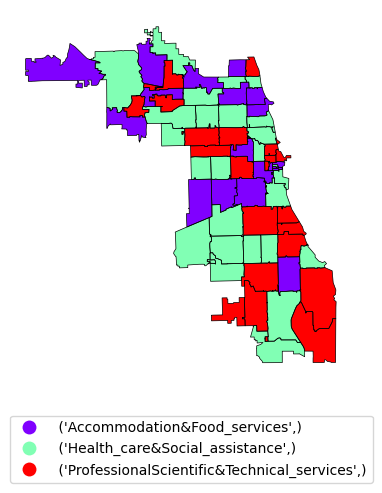

In [59]:
cmap = pl.cm.get_cmap('rainbow')

k = len(np.unique(labels))

norm = plt.Normalize(vmin=0, vmax=k-1)

gdf.plot(column='label', legend=True, categorical=True, cmap=cmap, legend_kwds={'loc': (0, -0.28)})
gdf.boundary.plot(color='k', linewidth=0.5, ax=plt.gca())
plt.axis('off') 
plt.savefig('Chicago_BP_GCT_choropleth_k5.svg', bbox_inches='tight')
plt.show()

In [60]:
important_feature_set

{0: (2,), 1: (3,), 2: (1,)}

In [61]:
y_var

['ArtsEntertainment&Recreation']

In [62]:
x_vars

['Finance&Insurance',
 'ProfessionalScientific&Technical_services',
 'Health_care&Social_assistance',
 'Accommodation&Food_services']

In [63]:
{k: [x_vars[i] for i in v] for k, v in important_feature_set.items()}

{0: ['Health_care&Social_assistance'],
 1: ['Accommodation&Food_services'],
 2: ['ProfessionalScientific&Technical_services']}

In [64]:
chicago_zipcodes = ctuids[chicago_mask2]
chicago_zipcodes

array([60007, 60018, 60068, 60131, 60176, 60601, 60602, 60603, 60604,
       60605, 60606, 60607, 60608, 60609, 60610, 60611, 60612, 60613,
       60614, 60615, 60616, 60617, 60618, 60619, 60620, 60621, 60622,
       60623, 60624, 60625, 60626, 60628, 60629, 60630, 60631, 60632,
       60633, 60634, 60636, 60637, 60638, 60639, 60640, 60641, 60642,
       60643, 60644, 60645, 60646, 60647, 60649, 60651, 60652, 60653,
       60654, 60655, 60656, 60657, 60659, 60660, 60661, 60706, 60707,
       60714, 60804, 60827])

## Clusters

In [65]:
j = 0
arr = ts_arr[:, labels==j, :].copy()

lrs = np.array([get_likelihoods(arr[:, [i], :], {0: important_feature_set[j]}, maxlag=1, fit_intercept=True, lambda_reg=0, which='unrestricted', return_thetas=True)[0] for i in range(arr.shape[1])])
max_lr_idx = np.argmax(lrs.flatten())
zc = chicago_zipcodes[labels == j][max_lr_idx]
print(zc)

get_likelihoods(arr[:, [max_lr_idx], :], {0: important_feature_set[j]}, maxlag=1, fit_intercept=True, lambda_reg=0, which='unrestricted', return_thetas=True)[1]

# first feature is the feature of interest, target and intercept are last

60642


array([ 1.49414961, -0.46374729,  0.15694765])

In [66]:
important_feature_set[j]

(2,)

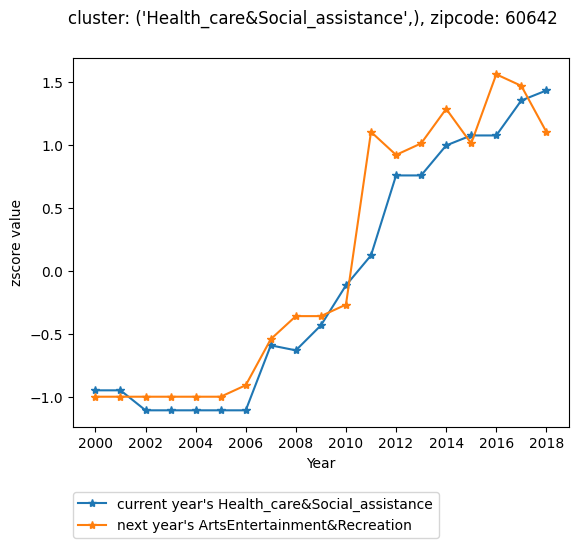

In [67]:
var_idx = important_feature_set[j]

if len(var_idx) > 1:
    fig = plt.figure(figsize=(12, 4))
    
x_year = np.arange(2000, 2019).astype(int)

for f in range(len(var_idx)):
    plt.subplot(1, len(var_idx), f+1)
    plt.plot(x_year, ts_arr[:-1, chicago_zipcodes == zc, var_idx[f]].flatten(), label=f"current year's {x_vars[var_idx[f]]}", marker='*')
    plt.plot(x_year, ts_arr[1:, chicago_zipcodes == zc, -1].flatten(), label=f"next year's {y_var[0]}", marker='*')
    plt.ylabel("zscore value")
    plt.xlabel('Year')
    plt.xticks(x_year[::2], x_year[::2])

    plt.legend(loc=(0, -0.3))

plt.suptitle(f"cluster: {tuple([x_vars[f] for f in var_idx])}, zipcode: {zc}")
plt.savefig(f'BP_cluster_{j}.svg', bbox_inches='tight')
plt.show()

In [68]:
zip_code_ts_arr = ts_arr[:, chicago_zipcodes == zc, :]

if len(var_idx) == 1:
    coint_t, p_value, critical_values = coint(zip_code_ts_arr[1:, 0, -1], zip_code_ts_arr[:-1, 0, var_idx], trend='c', maxlag=1, autolag=None)

    print(f"Test Statistic: {coint_t}")
    print(f"P-value: {p_value}")
    print(f"Critical Values: {critical_values}")

else:
        
    result = coint_johansen(zip_code_ts_arr[:, 0, list(var_idx)+[-1]], det_order=0, k_ar_diff=0)
        
    # Check the trace statistic against critical values
    for i, trace_stat in enumerate(result.lr1):
        critical_value_90 = result.cvt[i, 0]  # 90% critical value
        
        # If trace statistic is greater than the 90% critical value, print the critical values
        if trace_stat > critical_value_90:
            print(f"Rank {i}: Trace statistic ({trace_stat}) > 90% critical value ({critical_value_90})")
            print("Cointegrating relationship exists!")
            print(f"Critical values (90%, 95%, 99%): {result.cvt[i]}")

            break

    else:
        print("Not cointegrating")

Test Statistic: -3.5854879308201095
P-value: 0.025532799625089093
Critical Values: [-4.60835728 -3.69663864 -3.28846728]


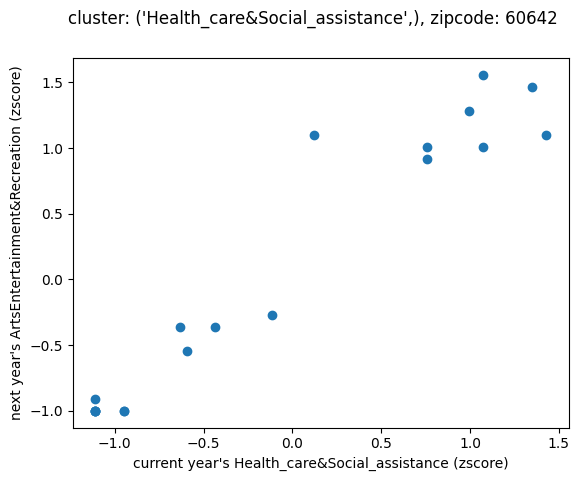

In [69]:
# plt.scatter(zip_code_ts_arr[:-1, 0, var_idx], zip_code_ts_arr[1:, 0, -1])
# plt.xlabel(f"current year's {x_vars[var_idx]} (zscore)")
# plt.ylabel("next year's median income (zscore)")
# plt.title(f"Zipcode {zc}")
# plt.show()

if len(var_idx) > 1:
    fig = plt.figure(figsize=(12, 4))
for f in range(len(var_idx)):
    plt.subplot(1, len(var_idx), f+1)
    plt.scatter(zip_code_ts_arr[:-1, 0, var_idx[f]], zip_code_ts_arr[1:, 0, -1])
    plt.xlabel(f"current year's {x_vars[var_idx[f]]} (zscore)")

    if f == 0:
        plt.ylabel(f"next year's {y_var[0]} (zscore)")

plt.suptitle(f"cluster: {tuple([x_vars[f] for f in var_idx])}, zipcode: {zc}")
# plt.savefig(f'BP_zipcode_{zc}.svg', bbox_inches='tight')
plt.show()

In [70]:
j = 1
arr = ts_arr[:, labels==j, :].copy()

lrs = np.array([get_likelihoods(arr[:, [i], :], {0: important_feature_set[j]}, maxlag=1, fit_intercept=True, lambda_reg=0, which='unrestricted', return_thetas=True)[0] for i in range(arr.shape[1])])
max_lr_idx = np.argmax(lrs.flatten())
zc = chicago_zipcodes[labels == j][max_lr_idx]
print(zc)

get_likelihoods(arr[:, [max_lr_idx], :], {0: important_feature_set[j]}, maxlag=1, fit_intercept=True, lambda_reg=0, which='unrestricted', return_thetas=True)[1]

# first feature is the feature of interest, target and intercept are last

60607


array([ 1.10119275, -0.11516308,  0.17082999])

In [71]:
important_feature_set[j]

(3,)

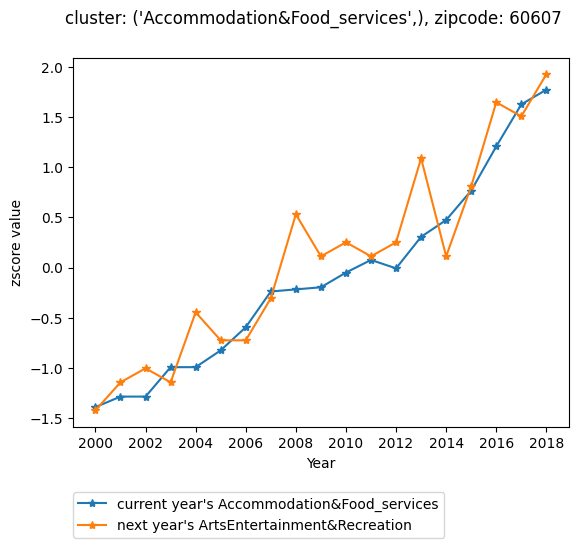

In [72]:
var_idx = important_feature_set[j]

if len(var_idx) > 1:
    fig = plt.figure(figsize=(12, 4))
    
x_year = np.arange(2000, 2019).astype(int)

for f in range(len(var_idx)):
    plt.subplot(1, len(var_idx), f+1)
    plt.plot(x_year, ts_arr[:-1, chicago_zipcodes == zc, var_idx[f]].flatten(), label=f"current year's {x_vars[var_idx[f]]}", marker='*')
    plt.plot(x_year, ts_arr[1:, chicago_zipcodes == zc, -1].flatten(), label=f"next year's {y_var[0]}", marker='*')
    plt.ylabel("zscore value")
    plt.xlabel('Year')
    plt.xticks(x_year[::2], x_year[::2])

    plt.legend(loc=(0, -0.3))

plt.suptitle(f"cluster: {tuple([x_vars[f] for f in var_idx])}, zipcode: {zc}")
plt.savefig(f'BP_cluster_{j}.svg', bbox_inches='tight')
plt.show()

In [73]:
zip_code_ts_arr = ts_arr[:, chicago_zipcodes == zc, :]

if len(var_idx) == 1:
    coint_t, p_value, critical_values = coint(zip_code_ts_arr[1:, 0, -1], zip_code_ts_arr[:-1, 0, var_idx], trend='c', maxlag=1, autolag=None)

    print(f"Test Statistic: {coint_t}")
    print(f"P-value: {p_value}")
    print(f"Critical Values: {critical_values}")

else:
        
    result = coint_johansen(zip_code_ts_arr[:, 0, list(var_idx)+[-1]], det_order=0, k_ar_diff=0)
        
    # Check the trace statistic against critical values
    for i, trace_stat in enumerate(result.lr1):
        critical_value_90 = result.cvt[i, 0]  # 90% critical value
        
        # If trace statistic is greater than the 90% critical value, print the critical values
        if trace_stat > critical_value_90:
            print(f"Rank {i}: Trace statistic ({trace_stat}) > 90% critical value ({critical_value_90})")
            print("Cointegrating relationship exists!")
            print(f"Critical values (90%, 95%, 99%): {result.cvt[i]}")

            break

    else:
        print("Not cointegrating")

Test Statistic: -4.9341465555867
P-value: 0.00021718077607992404
Critical Values: [-4.60835728 -3.69663864 -3.28846728]


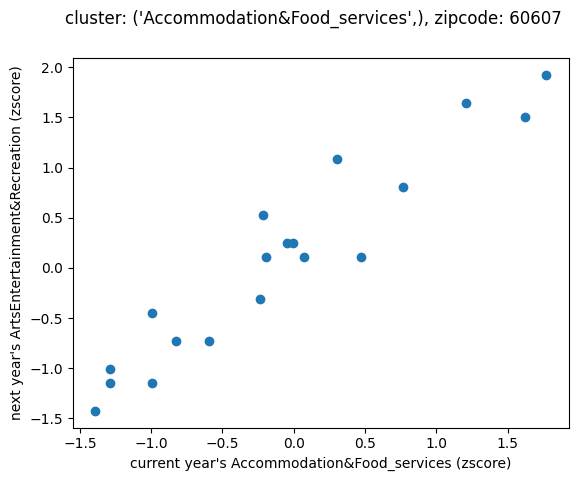

In [74]:
# plt.scatter(zip_code_ts_arr[:-1, 0, var_idx], zip_code_ts_arr[1:, 0, -1])
# plt.xlabel(f"current year's {x_vars[var_idx]} (zscore)")
# plt.ylabel("next year's median income (zscore)")
# plt.title(f"Zipcode {zc}")
# plt.show()

if len(var_idx) > 1:
    fig = plt.figure(figsize=(12, 4))
for f in range(len(var_idx)):
    plt.subplot(1, len(var_idx), f+1)
    plt.scatter(zip_code_ts_arr[:-1, 0, var_idx[f]], zip_code_ts_arr[1:, 0, -1])
    plt.xlabel(f"current year's {x_vars[var_idx[f]]} (zscore)")

    if f == 0:
        plt.ylabel(f"next year's {y_var[0]} (zscore)")

plt.suptitle(f"cluster: {tuple([x_vars[f] for f in var_idx])}, zipcode: {zc}")
plt.show()

In [75]:
j = 2
arr = ts_arr[:, labels==j, :].copy()

lrs = np.array([get_likelihoods(arr[:, [i], :], {0: important_feature_set[j]}, maxlag=1, fit_intercept=True, lambda_reg=0, which='unrestricted', return_thetas=True)[0] for i in range(arr.shape[1])])
max_lr_idx = np.argmax(lrs.flatten())
zc = chicago_zipcodes[labels == j][max_lr_idx]
print(zc)

get_likelihoods(arr[:, [max_lr_idx], :], {0: important_feature_set[j]}, maxlag=1, fit_intercept=True, lambda_reg=0, which='unrestricted', return_thetas=True)[1]

# first feature is the feature of interest, target and intercept are last

60612


array([0.57195267, 0.40227163, 0.23444466])

In [76]:
important_feature_set[j]

(1,)

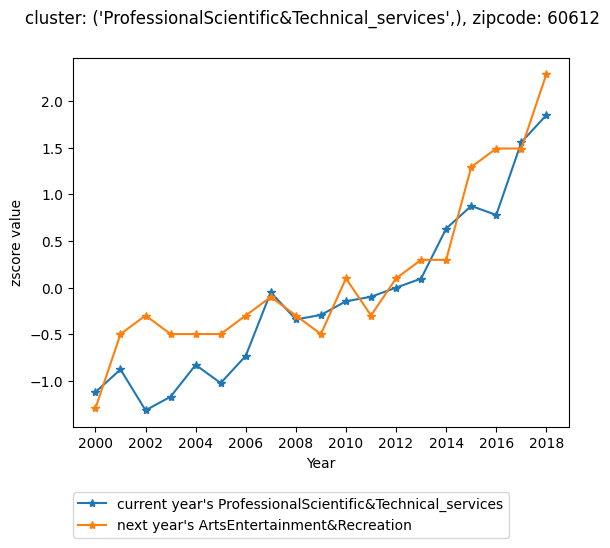

In [77]:
var_idx = important_feature_set[j]

if len(var_idx) > 1:
    fig = plt.figure(figsize=(12, 4))
    
x_year = np.arange(2000, 2019).astype(int)

for f in range(len(var_idx)):
    plt.subplot(1, len(var_idx), f+1)
    plt.plot(x_year, ts_arr[:-1, chicago_zipcodes == zc, var_idx[f]].flatten(), label=f"current year's {x_vars[var_idx[f]]}", marker='*')
    plt.plot(x_year, ts_arr[1:, chicago_zipcodes == zc, -1].flatten(), label=f"next year's {y_var[0]}", marker='*')
    plt.ylabel("zscore value")
    plt.xlabel('Year')
    plt.xticks(x_year[::2], x_year[::2])

    plt.legend(loc=(0, -0.3))

plt.suptitle(f"cluster: {tuple([x_vars[f] for f in var_idx])}, zipcode: {zc}")
plt.savefig(f'BP_cluster_{j}.svg', bbox_inches='tight')
plt.show()

In [78]:
zip_code_ts_arr = ts_arr[:, chicago_zipcodes == zc, :]

if len(var_idx) == 1:
    coint_t, p_value, critical_values = coint(zip_code_ts_arr[1:, 0, -1], zip_code_ts_arr[:-1, 0, var_idx], trend='c', maxlag=1, autolag=None)

    print(f"Test Statistic: {coint_t}")
    print(f"P-value: {p_value}")
    print(f"Critical Values: {critical_values}")

else:
        
    result = coint_johansen(zip_code_ts_arr[:, 0, list(var_idx)+[-1]], det_order=0, k_ar_diff=0)
        
    # Check the trace statistic against critical values
    for i, trace_stat in enumerate(result.lr1):
        critical_value_90 = result.cvt[i, 0]  # 90% critical value
        
        # If trace statistic is greater than the 90% critical value, print the critical values
        if trace_stat > critical_value_90:
            print(f"Rank {i}: Trace statistic ({trace_stat}) > 90% critical value ({critical_value_90})")
            print("Cointegrating relationship exists!")
            print(f"Critical values (90%, 95%, 99%): {result.cvt[i]}")

            break

    else:
        print("Not cointegrating")

Test Statistic: -2.5417115213073176
P-value: 0.2609892531291402
Critical Values: [-4.60835728 -3.69663864 -3.28846728]


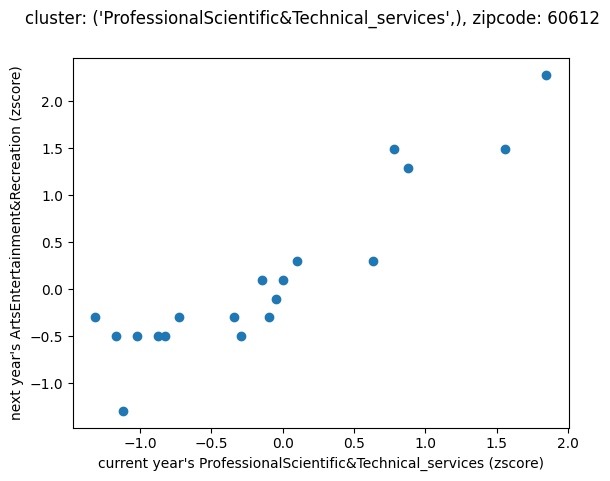

In [79]:
# plt.scatter(zip_code_ts_arr[:-1, 0, var_idx], zip_code_ts_arr[1:, 0, -1])
# plt.xlabel(f"current year's {x_vars[var_idx]} (zscore)")
# plt.ylabel("next year's median income (zscore)")
# plt.title(f"Zipcode {zc}")
# plt.show()

if len(var_idx) > 1:
    fig = plt.figure(figsize=(12, 4))
for f in range(len(var_idx)):
    plt.subplot(1, len(var_idx), f+1)
    plt.scatter(zip_code_ts_arr[:-1, 0, var_idx[f]], zip_code_ts_arr[1:, 0, -1])
    plt.xlabel(f"current year's {x_vars[var_idx[f]]} (zscore)")

    if f == 0:
        plt.ylabel(f"next year's {y_var[0]} (zscore)")

plt.suptitle(f"cluster: {tuple([x_vars[f] for f in var_idx])}, zipcode: {zc}")
# plt.savefig(f'BP_cluster_{j}.svg', bbox_inches='tight')
plt.show()

In [ ]:
j = 3
arr = ts_arr[:, labels==j, :].copy()

lrs = np.array([get_likelihoods(arr[:, [i], :], {0: important_feature_set[j]}, maxlag=1, fit_intercept=True, lambda_reg=0, which='unrestricted', return_thetas=True)[0] for i in range(arr.shape[1])])
max_lr_idx = np.argmax(lrs.flatten())
zc = chicago_zipcodes[labels == j][max_lr_idx]
print(zc)

get_likelihoods(arr[:, [max_lr_idx], :], {0: important_feature_set[j]}, maxlag=1, fit_intercept=True, lambda_reg=0, which='unrestricted', return_thetas=True)[1]

# first feature is the feature of interest, target and intercept are last

60612


array([0.57195267, 0.40227163, 0.23444466])

In [ ]:
important_feature_set[j]

(1,)

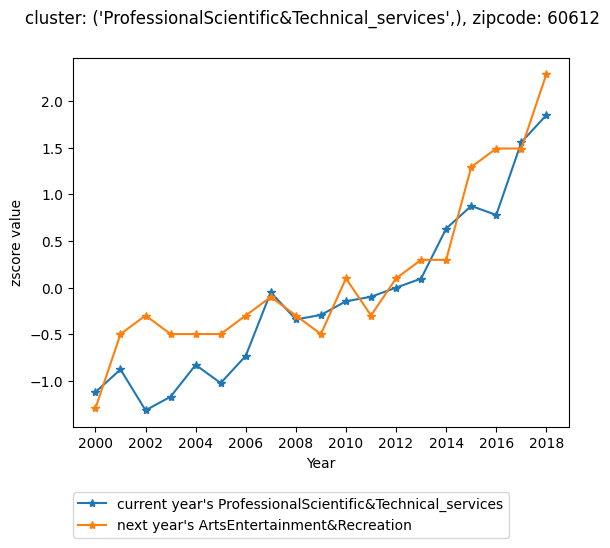

In [ ]:
var_idx = important_feature_set[j]

if len(var_idx) > 1:
    fig = plt.figure(figsize=(12, 4))
    
x_year = np.arange(2000, 2019).astype(int)

for f in range(len(var_idx)):
    plt.subplot(1, len(var_idx), f+1)
    plt.plot(x_year, ts_arr[:-1, chicago_zipcodes == zc, var_idx[f]].flatten(), label=f"current year's {x_vars[var_idx[f]]}", marker='*')
    plt.plot(x_year, ts_arr[1:, chicago_zipcodes == zc, -1].flatten(), label=f"next year's {y_var[0]}", marker='*')
    plt.ylabel("zscore value")
    plt.xlabel('Year')
    plt.xticks(x_year[::2], x_year[::2])

    plt.legend(loc=(0, -0.3))

plt.suptitle(f"cluster: {tuple([x_vars[f] for f in var_idx])}, zipcode: {zc}")
plt.savefig(f'BP_cluster_{j}.svg', bbox_inches='tight')
plt.show()

In [ ]:
zip_code_ts_arr = ts_arr[:, chicago_zipcodes == zc, :]

if len(var_idx) == 1:
    coint_t, p_value, critical_values = coint(zip_code_ts_arr[1:, 0, -1], zip_code_ts_arr[:-1, 0, var_idx], trend='c', maxlag=1, autolag=None)

    print(f"Test Statistic: {coint_t}")
    print(f"P-value: {p_value}")
    print(f"Critical Values: {critical_values}")

else:
        
    result = coint_johansen(zip_code_ts_arr[:, 0, list(var_idx)+[-1]], det_order=0, k_ar_diff=0)
        
    # Check the trace statistic against critical values
    for i, trace_stat in enumerate(result.lr1):
        critical_value_90 = result.cvt[i, 0]  # 90% critical value
        
        # If trace statistic is greater than the 90% critical value, print the critical values
        if trace_stat > critical_value_90:
            print(f"Rank {i}: Trace statistic ({trace_stat}) > 90% critical value ({critical_value_90})")
            print("Cointegrating relationship exists!")
            print(f"Critical values (90%, 95%, 99%): {result.cvt[i]}")

            break

    else:
        print("Not cointegrating")

Test Statistic: -2.5417115213073176
P-value: 0.2609892531291402
Critical Values: [-4.60835728 -3.69663864 -3.28846728]


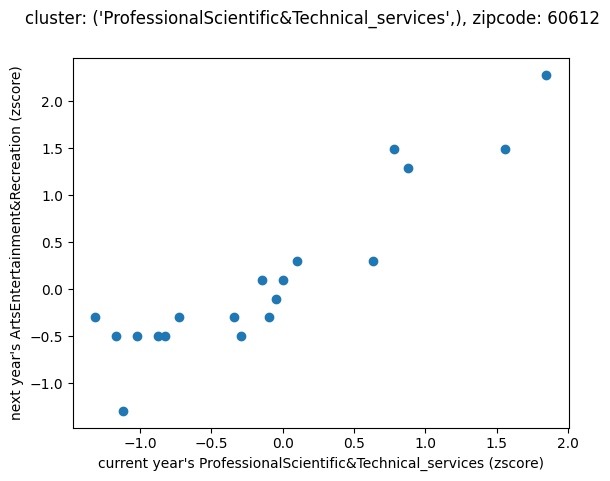

In [ ]:
# plt.scatter(zip_code_ts_arr[:-1, 0, var_idx], zip_code_ts_arr[1:, 0, -1])
# plt.xlabel(f"current year's {x_vars[var_idx]} (zscore)")
# plt.ylabel("next year's median income (zscore)")
# plt.title(f"Zipcode {zc}")
# plt.show()

if len(var_idx) > 1:
    fig = plt.figure(figsize=(12, 4))
for f in range(len(var_idx)):
    plt.subplot(1, len(var_idx), f+1)
    plt.scatter(zip_code_ts_arr[:-1, 0, var_idx[f]], zip_code_ts_arr[1:, 0, -1])
    plt.xlabel(f"current year's {x_vars[var_idx[f]]} (zscore)")

    if f == 0:
        plt.ylabel(f"next year's {y_var[0]} (zscore)")

plt.suptitle(f"cluster: {tuple([x_vars[f] for f in var_idx])}, zipcode: {zc}")
# plt.savefig(f'BP_cluster_{j}.svg', bbox_inches='tight')
plt.show()

In [ ]:
j = 4
arr = ts_arr[:, labels==j, :].copy()

lrs = np.array([get_likelihoods(arr[:, [i], :], {0: important_feature_set[j]}, maxlag=1, fit_intercept=True, lambda_reg=0, which='unrestricted', return_thetas=True)[0] for i in range(arr.shape[1])])
max_lr_idx = np.argmax(lrs.flatten())
zc = chicago_zipcodes[labels == j][max_lr_idx]
print(zc)

get_likelihoods(arr[:, [max_lr_idx], :], {0: important_feature_set[j]}, maxlag=1, fit_intercept=True, lambda_reg=0, which='unrestricted', return_thetas=True)[1]

# first feature is the feature of interest, target and intercept are last

60621


array([ 0.4705387 ,  0.36476427, -0.05761435])

In [ ]:
important_feature_set[j]

(0,)

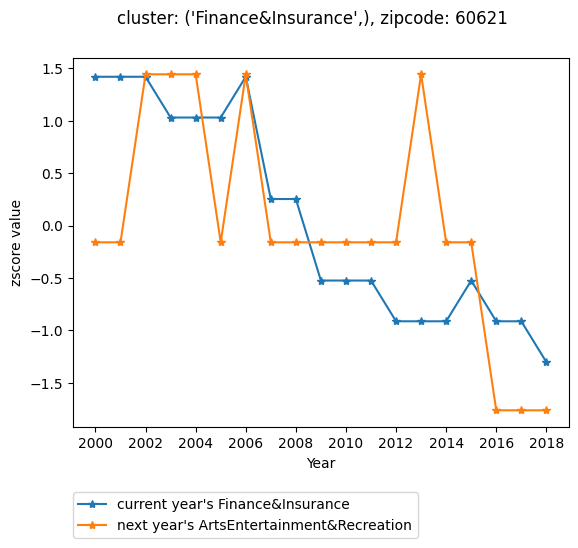

In [ ]:
var_idx = important_feature_set[j]

if len(var_idx) > 1:
    fig = plt.figure(figsize=(12, 4))
    
x_year = np.arange(2000, 2019).astype(int)

for f in range(len(var_idx)):
    plt.subplot(1, len(var_idx), f+1)
    plt.plot(x_year, ts_arr[:-1, chicago_zipcodes == zc, var_idx[f]].flatten(), label=f"current year's {x_vars[var_idx[f]]}", marker='*')
    plt.plot(x_year, ts_arr[1:, chicago_zipcodes == zc, -1].flatten(), label=f"next year's {y_var[0]}", marker='*')
    plt.ylabel("zscore value")
    plt.xlabel('Year')
    plt.xticks(x_year[::2], x_year[::2])

    plt.legend(loc=(0, -0.3))

plt.suptitle(f"cluster: {tuple([x_vars[f] for f in var_idx])}, zipcode: {zc}")
plt.savefig(f'BP_cluster_{j}.svg', bbox_inches='tight')
plt.show()

In [ ]:
zip_code_ts_arr = ts_arr[:, chicago_zipcodes == zc, :]

if len(var_idx) == 1:
    coint_t, p_value, critical_values = coint(zip_code_ts_arr[1:, 0, -1], zip_code_ts_arr[:-1, 0, var_idx], trend='c', maxlag=1, autolag=None)

    print(f"Test Statistic: {coint_t}")
    print(f"P-value: {p_value}")
    print(f"Critical Values: {critical_values}")

else:
        
    result = coint_johansen(zip_code_ts_arr[:, 0, list(var_idx)+[-1]], det_order=0, k_ar_diff=0)
        
    # Check the trace statistic against critical values
    for i, trace_stat in enumerate(result.lr1):
        critical_value_90 = result.cvt[i, 0]  # 90% critical value
        
        # If trace statistic is greater than the 90% critical value, print the critical values
        if trace_stat > critical_value_90:
            print(f"Rank {i}: Trace statistic ({trace_stat}) > 90% critical value ({critical_value_90})")
            print("Cointegrating relationship exists!")
            print(f"Critical values (90%, 95%, 99%): {result.cvt[i]}")

            break

    else:
        print("Not cointegrating")

Test Statistic: -2.442733995998471
P-value: 0.30489141906933337
Critical Values: [-4.60835728 -3.69663864 -3.28846728]


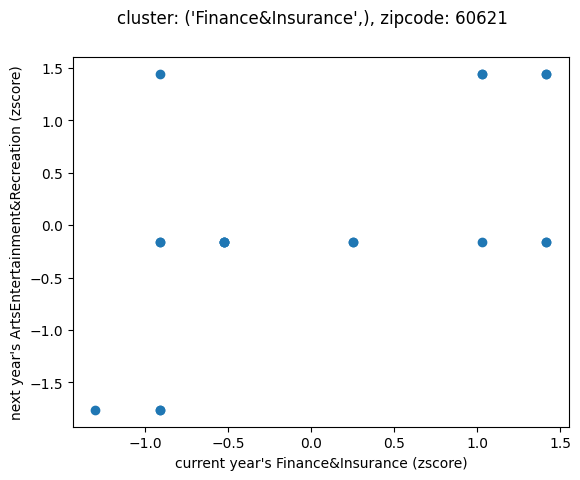

In [ ]:
# plt.scatter(zip_code_ts_arr[:-1, 0, var_idx], zip_code_ts_arr[1:, 0, -1])
# plt.xlabel(f"current year's {x_vars[var_idx]} (zscore)")
# plt.ylabel("next year's median income (zscore)")
# plt.title(f"Zipcode {zc}")
# plt.show()

if len(var_idx) > 1:
    fig = plt.figure(figsize=(12, 4))
for f in range(len(var_idx)):
    plt.subplot(1, len(var_idx), f+1)
    plt.scatter(zip_code_ts_arr[:-1, 0, var_idx[f]], zip_code_ts_arr[1:, 0, -1])
    plt.xlabel(f"current year's {x_vars[var_idx[f]]} (zscore)")

    if f == 0:
        plt.ylabel(f"next year's {y_var[0]} (zscore)")

plt.suptitle(f"cluster: {tuple([x_vars[f] for f in var_idx])}, zipcode: {zc}")
# plt.savefig(f'BP_cluster_{j}.svg', bbox_inches='tight')
plt.show()

# End Chicago

In [ ]:
print_model(theta_u, vars=vars, maxlag=maxlag, sort_by_weights=True, fit_intercept=fit_intercept)

In [ ]:
def get_pred(X, theta_us, labels, maxlag, fit_intercept, y_col_idx=-1):
    N = X.shape[1]
    K = len(np.unique(labels))

    arr = []

    for i in np.arange(N):
        Xi = X[:, i, :]
        Xi_u, _, _ = create_design_data(Xi, maxlag=maxlag, y_col_idx=y_col_idx, fit_intercept=fit_intercept)

        y_pred = np.matmul(Xi_u, theta_us[labels[i]])

        arr.append(y_pred.flatten())

    return np.array(arr)

In [ ]:
# u_ptsc_pred = get_pred(ts_arr, theta_u, labels, maxlag, fit_intercept)
# u_ptsc_pred.shape

In [ ]:
# g_ptsc_pred = get_pred(ts_arr, theta_u, labels, maxlag, fit_intercept)
# g_ptsc_pred.shape

In [ ]:
zip_codes_down_town_chicago = [60601, 60602, 60603, 60604, 60605, 60606, 60607, 60610, 60611, 60613, 60614, 60616, 60654, 60661]
fig = plt.figure(figsize=(15, 15))

for i in range(len(zip_codes_down_town_chicago)):
    zip_i = zip_codes_down_town_chicago[i]
    idx = np.arange(len(zip_codes))[zip_codes == zip_i]
    arr = ts_arr[:, idx, :]
    # fig, axes = tsp.plot(X=arr[:, :, [-1]], show_X_marker=True, title_list=y_var)
    axes = [fig.add_subplot(5, 3, i+1)]

    axes[-1].scatter(np.arange(1, arr.shape[0]), arr[1:, 0, [-1]])

    ma = arr[:, 0, :].cumsum(axis=0) / np.arange(1, arr.shape[0]+1).reshape(-1, 1)



    # for f in range(arr.shape[-1]):
    #     # axes[f].plot(ma[:, f], label='MA')
    #     # axes[f].plot(arr[1:, 0, f], label='y_future', marker='*')
    #     ma = pd.Series(arr[:, 0, f]).expanding().mean()
    #     axes[f].plot(ma.values, label='MA')

    #     axes[f].legend()

    axes[-1].plot(np.arange(arr.shape[0])[-u_ptsc_pred.shape[1]:], u_ptsc_pred[idx].flatten(), label='U_PTSC_pred', color='r', marker='.')
    axes[-1].plot(np.arange(arr.shape[0])[-g_ptsc_pred.shape[1]:], g_ptsc_pred[idx].flatten(), label='G_PTSC_pred', color='g', marker='.')

    # axes[-1].plot(np.arange(arr.shape[0])[-u_ptsc_pred.shape[1]:], u_ptsc_pred[idx].flatten().cumsum() / u_ptsc_pred.shape[1], color='r', ls='--', 
    #               label='MA_U_PTSC_pred')
    # axes[-1].plot(np.arange(arr.shape[0])[-g_ptsc_pred.shape[1]:], g_ptsc_pred[idx].flatten().cumsum() / u_ptsc_pred.shape[1], color='g', ls='--',
    #                label='MA_G_PTSC_pred')
    axes[-1].set_title(str(zip_i))

    plt.legend()

plt.show()


In [ ]:
## U-PTSC

k = 3

idx_mask = zip_codes == 60661 #labels == k

fig = plt.figure(figsize=(15, 12))

coef = list(theta_u[k][1:].flatten()) + list(theta_u[k][0].flatten())

nrows, ncols = 3, 2

for f in range(ts_arr.shape[-1]):
    ax = fig.add_subplot(nrows, ncols, f+1)
    ax.scatter(ts_arr[:-1, idx_mask, f], ts_arr[1:, idx_mask, -1], label='data')
    # ax.scatter(ts_arr[:-1, idx_mask, f], u_ptsc_pred[idx_mask, :])
    ax.plot(ts_arr[:-1, idx_mask, f].flatten(), ts_arr[:-1, idx_mask, f].flatten() * coef[f], color='r', label='coef')
    
    ax.set_xlabel(f"current year's {(x_vars + y_var)[f]}")

    if f % ncols == 0:
        ax.set_ylabel("next year's median income")

    ax.legend()

plt.show()

In [ ]:
## G-PTSC

k = 0

idx_mask = zip_codes == 60661 #labels == k

fig = plt.figure(figsize=(15, 12))

coef = list(theta_u[k][1:].flatten()) + list(theta_u[k][0].flatten())

nrows, ncols = 3, 2

for f in range(ts_arr.shape[-1]):
    ax = fig.add_subplot(nrows, ncols, f+1)
    ax.scatter(ts_arr[:-1, idx_mask, f], ts_arr[1:, idx_mask, -1], label='data')
    # ax.scatter(ts_arr[:-1, idx_mask, f], u_ptsc_pred[idx_mask, :])
    ax.plot(ts_arr[:-1, idx_mask, f].flatten(), ts_arr[:-1, idx_mask, f].flatten() * coef[f], color='r', label='coef')
    
    ax.set_xlabel(f"current year's {(x_vars + y_var)[f]}")

    if f % ncols == 0:
        ax.set_ylabel("next year's median income")

    ax.legend()

plt.show()

END

In [ ]:
k = 0
gdf_ = gdf[gdf['label'] == f'Cluster {k}'].reset_index()
gdf_['zip_code'] = gdf_['zip_code'].astype(str)
gdf_['zip_code'] = gdf_['zip_code'][gdf_['zip_code'] == '60661']
gdf_.plot(column='zip_code', legend=True, legend_kwds={'loc': (1.01, 0)}
                                          )
gdf.boundary.plot(color='k', linewidth=0.5, ax=plt.gca())
plt.axis('off')
plt.show()


In [ ]:
label_dict = {
    'T': years,
    'F': vars
}
tsp.waterfall_plot(ts_arr[:, np.argmax(ctuids==60646), :], label_dict=label_dict);

In [ ]:
tsp.plot(X=ts_arr[:, :, :], label_dict=label_dict, entity_idx=[np.argmax(ctuids==60646)], entities_labels=['60646'],
         show_all_entities=False, shape_of_subplot=(3, 2), figsize=(10, 8), annot_fontsize=10)
plt.show()

In [ ]:
k = 2
gdf[gdf['label'] == k].plot(column='zipcode', legend=True, legend_kwds={'loc': (1.01, 0)})
gdf[gdf['label'] == k].boundary.plot(color='k', linewidth=0.5, ax=plt.gca())
plt.axis('off')
plt.show()


TotalPopulation

In [ ]:

var = 'TotalPopulation'

fig = plt.figure(figsize=(12, 4))

for i in range(len(years)):
    ax = fig.add_subplot(3, 3, i+1)
    gdf.plot(column=var+"_"+years[i], ax=ax, legend=True, cmap='rainbow')

    plt.title(f"year '{years[i]}")
    plt.axis('off') 

plt.suptitle(f"change in {var}")
plt.savefig('Toronto_census_popdens_choropleth_k6.svg', bbox_inches='tight')

plt.show()

MedianAge(years)

In [ ]:
var = 'MedianAge(years)'

fig = plt.figure(figsize=(12, 4))

for i in range(len(years)):
    ax = fig.add_subplot(3, 3, i+1)
    gdf.plot(column=var+"_"+years[i], ax=ax, legend=True, cmap='rainbow')

    plt.title(f"year '{years[i]}")
    plt.axis('off') 

plt.suptitle(f"change in {var}")
plt.savefig('Toronto_census_dwhirise_choropleth_k6.svg', bbox_inches='tight')

plt.show()

PercentBAOrHigher

In [ ]:
var = 'PercentBAOrHigher'

fig = plt.figure(figsize=(12, 4))

for i in range(len(years)):
    ax = fig.add_subplot(3, 3, i+1)
    gdf.plot(column=var+"_"+years[i], ax=ax, legend=True, cmap='rainbow')

    plt.title(f"year '{years[i]}")
    plt.axis('off') 

plt.suptitle(f"change in {var}")
plt.savefig('Toronto_census_ageyouth_choropleth_k6.svg', bbox_inches='tight')

plt.show()

PercentUnemployed

In [ ]:
var = 'PercentUnemployed'

fig = plt.figure(figsize=(12, 4))

for i in range(len(years)):
    ax = fig.add_subplot(3, 3, i+1)
    gdf.plot(column=var+"_"+years[i], ax=ax, legend=True, cmap='rainbow')

    plt.title(f"year '{years[i]}")
    plt.axis('off') 

plt.suptitle(f"change in {var}")
plt.savefig('Toronto_census_vmblack_choropleth_k6.svg', bbox_inches='tight')

plt.show()

HouseholdIncome

In [ ]:
var = 'HouseholdIncome'

fig = plt.figure(figsize=(12, 4))

for i in range(len(years)):
    ax = fig.add_subplot(3, 3, i+1)
    gdf.plot(column=var+"_"+years[i], ax=ax, legend=True, cmap='rainbow')

    plt.title(f"year '{years[i]}")
    plt.axis('off') 

plt.suptitle(f"change in {var}")
plt.savefig('Toronto_census_unemp_choropleth_k6.svg', bbox_inches='tight')

plt.show()

# End